In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("global_heat_index.csv")

In [10]:
df 

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


#### we observe that at night and at early morning as no sunlight is there, NO energy from Solar Radiation is generated. so we will remove it from the dataset.

In [11]:
clean1 = df[df["Hour"]<6]
clean2 = df[df["Hour"]>18]

In [12]:
clean1

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
...,...,...,...,...,...,...,...,...,...,...,...
17497,2012,12,31,1,-5,11.315471,985.932617,30.682259,38.321774,3.777516,0
17498,2012,12,31,2,-5,10.787607,985.947388,31.229513,36.505356,3.849925,0
17499,2012,12,31,3,-5,10.252810,985.895508,31.895935,34.571266,3.870963,0
17500,2012,12,31,4,-5,9.721154,986.132629,32.678711,33.399612,3.863656,0


In [13]:
clean2

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
...,...,...,...,...,...,...,...,...,...,...,...
17515,2012,12,31,19,-6,14.702595,984.779114,22.647353,54.538628,3.383211,0
17516,2012,12,31,20,-6,13.823766,985.189148,23.993252,61.517830,3.519155,0
17517,2012,12,31,21,-6,12.951590,984.829224,25.759637,65.096191,3.518434,0
17518,2012,12,31,22,-5,12.138259,984.735046,27.901296,66.668427,3.400819,0


In [14]:
df = df.drop(clean1.index, axis=0)
df = df.drop(clean2.index, axis=0)


In [15]:
a = df[df["Dew Point"]<0]
df = df.drop(a.index, axis=0)

In [16]:
df.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [17]:
x = df.drop("Solar Radiation (GHI)", axis=1)
y = df["Solar Radiation (GHI)"]

In [18]:
x

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695
...,...,...,...,...,...,...,...,...,...,...
17417,2012,12,27,17,0,20.071882,982.375366,27.923669,251.050263,2.513612
17418,2012,12,27,18,1,18.940459,982.932068,30.070982,255.801437,2.382141
17440,2012,12,28,16,0,21.830693,980.448364,22.383898,284.306458,3.056802
17441,2012,12,28,17,0,18.712635,981.048157,28.588805,301.590668,3.353595


In [19]:
y

6          0
7          0
8        159
9        363
10       533
        ... 
17417     13
17418      0
17440    210
17441     15
17442      0
Name: Solar Radiation (GHI), Length: 8052, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scx = MinMaxScaler()

In [22]:
scaledx = scx.fit_transform(x)

In [23]:
scaledx = pd.DataFrame(scaledx)

In [24]:
scaledx

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.000000,0.000000,0.074074,0.052798,0.755006,0.652524,0.266439,0.245979
1,0.0,0.0,0.000000,0.083333,0.074074,0.079061,0.782749,0.620236,0.292476,0.218438
2,0.0,0.0,0.000000,0.166667,0.111111,0.145734,0.812905,0.525943,0.315058,0.194155
3,0.0,0.0,0.000000,0.250000,0.111111,0.205683,0.823953,0.442115,0.326210,0.142382
4,0.0,0.0,0.000000,0.333333,0.111111,0.290914,0.818424,0.332087,0.201505,0.071046
...,...,...,...,...,...,...,...,...,...,...
8047,1.0,1.0,0.866667,0.916667,0.000000,0.314744,0.618929,0.238917,0.698114,0.342223
8048,1.0,1.0,0.866667,1.000000,0.037037,0.290580,0.638485,0.261592,0.711328,0.324106
8049,1.0,1.0,0.900000,0.833333,0.000000,0.352306,0.551239,0.180421,0.790605,0.417073
8050,1.0,1.0,0.900000,0.916667,0.000000,0.285715,0.572308,0.245941,0.838675,0.457971


In [25]:
corr_max = scaledx.corr() #Correlation Matrix

In [26]:
corr_max

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.044420,-0.004513,0.002728,-0.041341,0.117282,-0.045510,-0.134536,0.044818,0.041832
1,0.044420,1.000000,0.005333,0.009101,0.388634,-0.083094,0.076824,0.377219,-0.137731,-0.271405
2,-0.004513,0.005333,1.000000,0.002330,0.024180,-0.007100,0.034650,0.023649,-0.012047,0.048029
3,0.002728,0.009101,0.002330,1.000000,-0.014305,0.260388,-0.179583,-0.231782,0.083485,-0.012580
4,-0.041341,0.388634,0.024180,-0.014305,1.000000,0.227856,-0.615382,0.735219,0.197860,0.067340
5,0.117282,-0.083094,-0.007100,0.260388,0.227856,1.000000,-0.639554,-0.429352,0.434157,0.323720
6,-0.045510,0.076824,0.034650,-0.179583,-0.615382,-0.639554,1.000000,-0.170205,-0.422067,-0.462356
7,-0.134536,0.377219,0.023649,-0.231782,0.735219,-0.429352,-0.170205,1.000000,-0.076793,-0.155691
8,0.044818,-0.137731,-0.012047,0.083485,0.197860,0.434157,-0.422067,-0.076793,1.000000,0.227482
9,0.041832,-0.271405,0.048029,-0.012580,0.067340,0.323720,-0.462356,-0.155691,0.227482,1.000000


<Axes: >

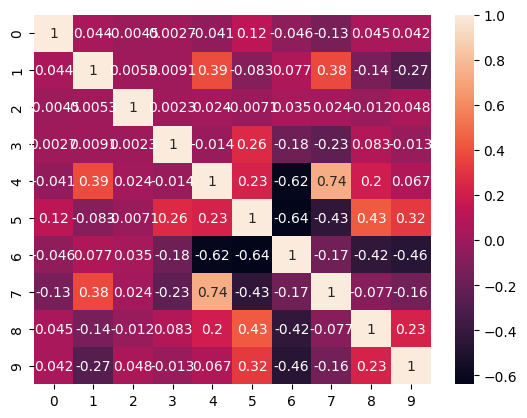

In [27]:
sns.heatmap(data=corr_max, annot = True)

# ExtraTreeClassifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
etc = ExtraTreesClassifier()

In [30]:
etc.fit(x, y)

ExtraTreesClassifier()

In [31]:
col = ["Year", "Month",	"Day", "Hour", "Dew Point",	"Temperature", "Pressure", "Relative Humidity",	"Wind Direction", "Wind Speed"]

In [32]:
imp_feat = pd.Series(etc.feature_importances_, index = col)

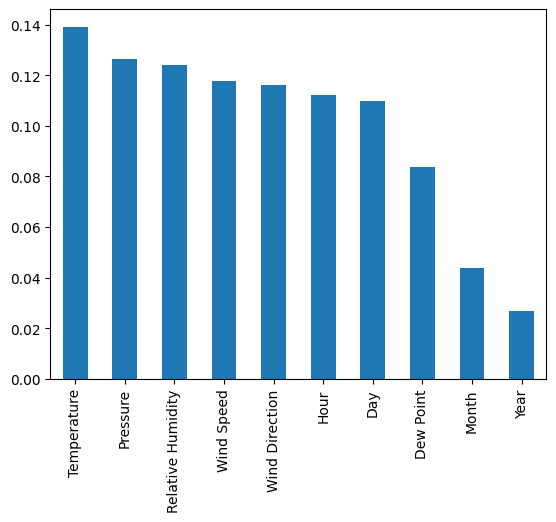

In [33]:
imp_feat.nlargest(10).plot(kind="bar")
plt.show()

## SelectKBest method

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k = 10).fit(x, y)

In [37]:
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(col)

In [41]:
feature_score = pd.concat([columns, scores], axis=1)


TypeError: 'Int64Index' object is not callable

In [43]:
feature_score.columns = ["Features", "Scores"]

In [44]:
feature_score

,Features,Scores
0,Year,0.130710
1,Month,2009.466594
2,Day,5732.951920
3,Hour,1589.238751
4,Dew Point,7992.226761
5,Temperature,9595.023801
6,Pressure,91.151472
7,Relative Humidity,30994.589225
8,Wind Direction,66982.580423
9,Wind Speed,1121.699595


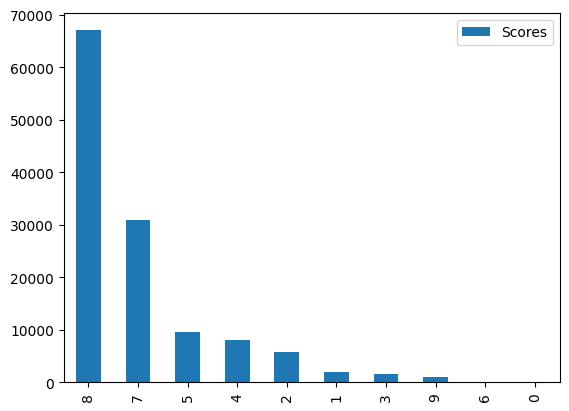

In [45]:
feature_score.nlargest(10, "Scores").plot(kind="bar")
plt.show()